In [16]:
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Perceptron,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn import metrics

In [17]:
iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Create data and targets

Split between virginica and non-virginica, convert to 1 and 0

Reduce dimesion using PCA

In [18]:
def IsVirginica(val):
    if val == 2:
        return 1
    else:
        return 0
    
train = iris.data
target = np.array([IsVirginica(val) for val in iris.target])

pcatrain = PCA(n_components=2).fit_transform(train)


Function to draw result of classifier on 2D graph, so reduced dimension data is used

In [19]:
def DrawResult(model,tr,tg):
    model.fit(tr,tg)
    x_min, x_max = tr[:, 0].min() - 1, tr[:, 0].max() + 1
    y_min, y_max = tr[:, 1].min() - 1, tr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max),np.arange(y_min, y_max))
    plt.subplot()
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    plt.scatter(tr[:, 0], tr[:, 1],c=tg,cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

Function to print accuracy and confusion matrix of classifier, so original data is use

In [20]:
def PrintAccuracy(model,tr,tg):
    xtrain,xtest,ytrain,ytest = train_test_split(tr,tg,test_size=0.3)
    model.fit(xtrain,ytrain)
    sres = model.predict(xtest)
    cm = metrics.confusion_matrix(ytest,sres)
    metrics.ConfusionMatrixDisplay(confusion_matrix = cm).plot()
    print('accuracy score =',metrics.accuracy_score(ytest,sres))

Support vector machine

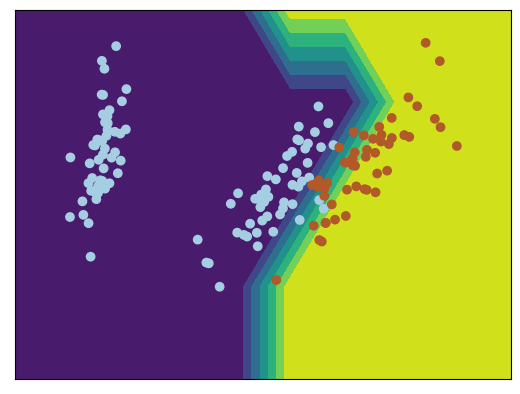

In [21]:
svm = SVC(kernel='poly',degree=5,C=10000)
DrawResult(svm,pcatrain,target)

accuracy score = 0.9555555555555556


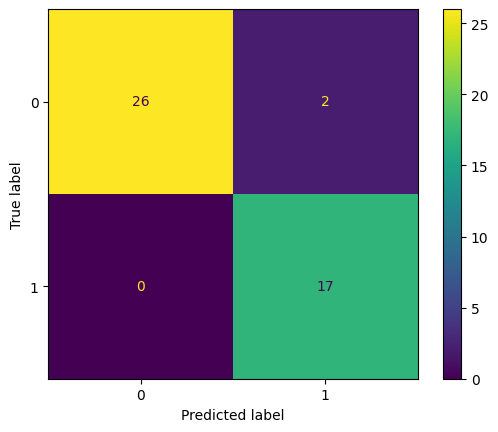

In [22]:
PrintAccuracy(svm,train,target)

Logistic regression

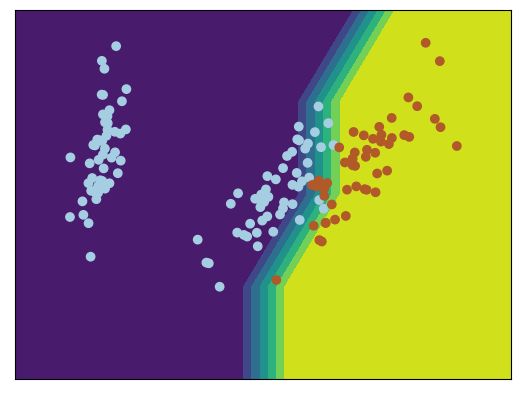

In [23]:
lr = LogisticRegression()
DrawResult(lr,pcatrain,target)

accuracy score = 0.9777777777777777


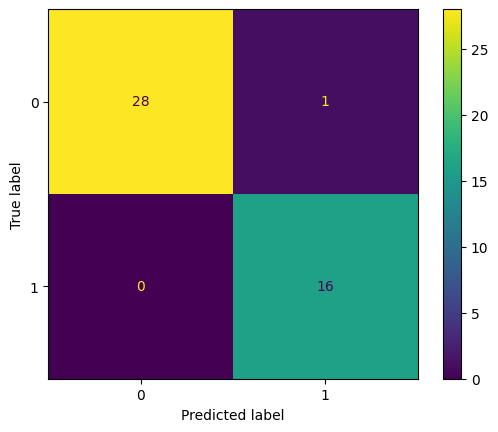

In [24]:
PrintAccuracy(lr,train,target)

K-nearest neighbour

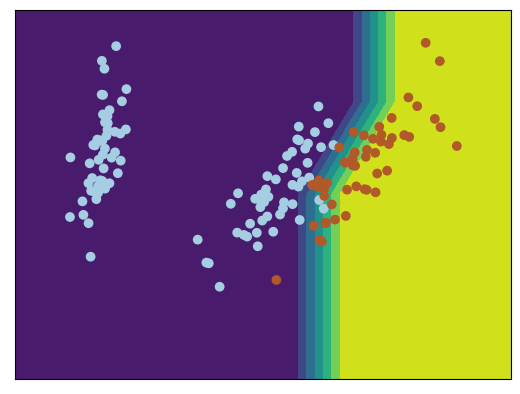

In [25]:
knn = KNeighborsClassifier(2)
DrawResult(knn,pcatrain,target)

accuracy score = 0.9555555555555556


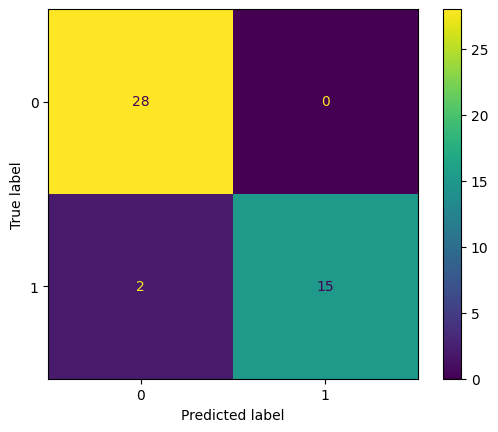

In [26]:
PrintAccuracy(knn,train,target)

Voting classifier: hard

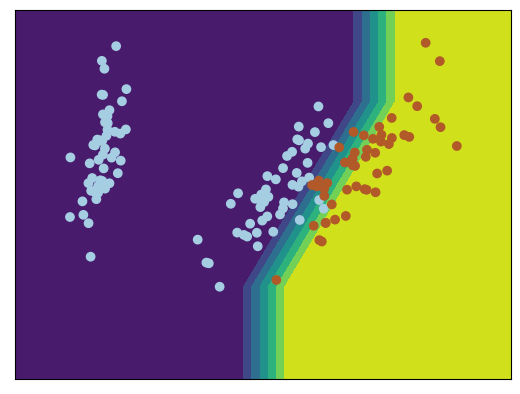

In [27]:
vc = VotingClassifier(estimators=[['svm',SVC(kernel='poly',degree=5,C=10000)],['lr',LogisticRegression()],['knn',KNeighborsClassifier(2)]],voting='hard')
DrawResult(vc,pcatrain,target)

accuracy score = 0.9333333333333333


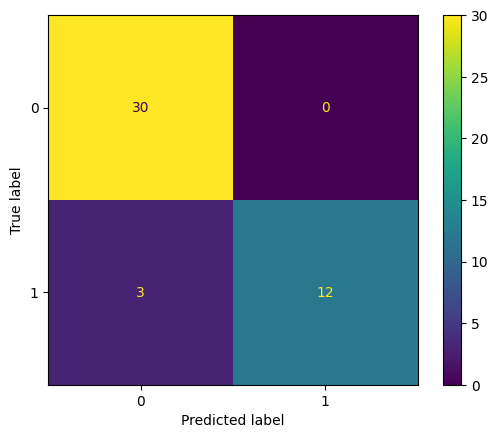

In [28]:
PrintAccuracy(vc,train,target)

Result is obviously close to 3 individual classifiers because of their high precision

Perceptron

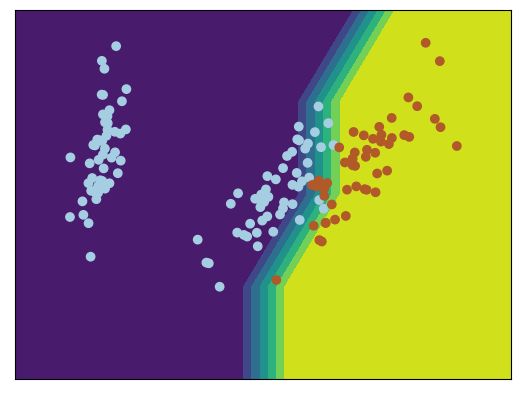

In [29]:
pct = Perceptron(max_iter=1000,random_state=1)
DrawResult(pct,pcatrain,target)

accuracy score = 0.9555555555555556


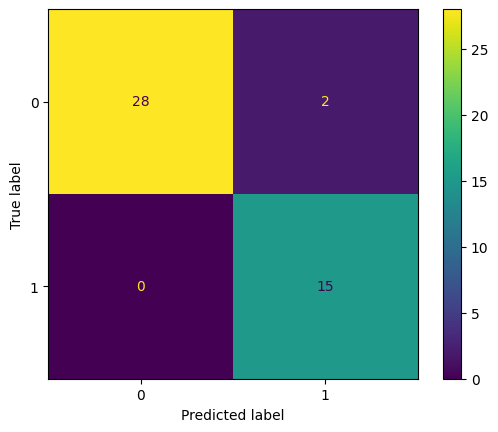

In [30]:
PrintAccuracy(pct,train,target)

Result is quite close to the voting classifier